Import a few things

In [4]:
# %matplotlib widget
import sys  
sys.path.insert(1, '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/CorkCapPy')
from raman import *


set raman txt file to import 

In [2]:
folder = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Raman/07_10_2024/'
file_name = 'Carbon_paper__532 nm_x100 vis_200_100%_5 s_5__2024_07_10_01.txt'

Run baseline correction and smoothing function

In [ ]:
wave_number , counts = import_raman(folder + file_name) 
baseline_fit = asymmetric_least_squares_smoothing(counts, p = 0.01, lam=1e7)
corrected_signal = counts - baseline_fit
base_corr_smothed = apply_Savitzky_Golay(corrected_signal)
plt.plot(wave_number, counts, color = 'red', label = 'original')
plt.plot(wave_number, base_corr_smothed, color = 'black', label = 'corrected signal')
plt.legend(frameon = False)
plt.tight_layout()
plt.xlabel(r'Raman shift $\bf(cm^{-1})$', weight = 'bold' )
plt.ylabel('Counts', weight = 'bold')

plot the results and save figure

In [ ]:
plot_raman(wave_number, base_corr_smothed, pp = True)
plt.savefig(folder + file_name.split('.')[-2] + file_name + '.pdf')

In [3]:


def asymmetric_least_squares_smoothing(y, lam = 1e10, p=0.05, niter = 100):
    """
    Perform Asymmetric Least Squares Smoothing to correct the baseline of a signal.

    Parameters:
    y (numpy.ndarray): The input signal (1D array).
    lam (float): The smoothing parameter. Larger values make the baseline smoother.
    p (float): The asymmetry parameter. Must be between 0 and 1.
    niter (int): The number of iterations to perform.

    Returns:
    numpy.ndarray: The estimated baseline of the signal.
    """
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L-2))
    w = np.ones(L)
    
    for i in range(niter):
        W = sparse.diags(w, 0)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    
    return z

baseline = asymmetric_least_squares_smoothing(Abs)
corrected_signal = Abs - baseline

# Plot the results
fig, ax = plt.subplots()
ax.plot(data[:,0], Abs, label='Original Signal', color = 'black')
ax.plot(data[:,0], baseline, label='Estimated Baseline', linestyle='--')
ax.plot(data[:,0], corrected_signal, label='Corrected Signal', color = 'red')
plt.legend()
ax.set_xlabel(r'Raman shift $\bf(cm^{-1})$', weight = 'bold' )
ax.set_ylabel('Counts', weight = 'bold')
plt.show()

NameError: name 'Abs' is not defined

In [ ]:
from raman import *

wave_number , counts = import_raman('/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/Raman/23-09-2024/CA_MnOx_10s_532 nm_600 gr_mm_x100 vis_150_10%_10_5 s_600 gr_mm_01.txt')

plot_raman(wave_number , counts)
baseline_fit = asymmetric_least_squares_smoothing(counts)
corrected_signal = counts - baseline_fit
base_corr_smothed = apply_Savitzky_Golay(corrected_signal)
plot_raman(wave_number, base_corr_smothed)


# 26-09-2024

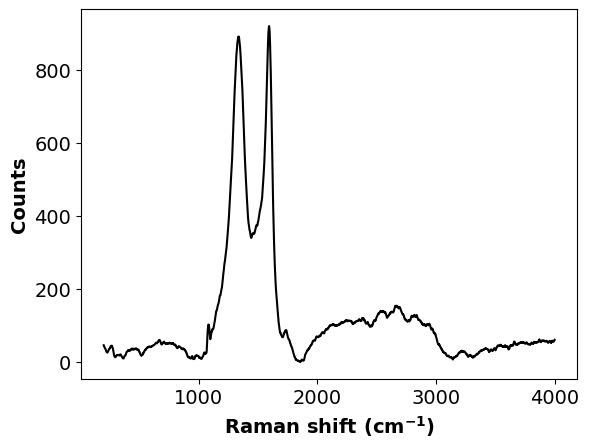

In [6]:
from raman import *

folder = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/Raman/26-09-2024/'

wave_number , counts = import_raman(folder + 'CS_SA_C_TP532 nm_600 gr_mm_x50 LWD_200_25%_10_5 s_600 gr_mm_01.txt')

# plot_raman(wave_number, counts)
baseline_fit  = asymmetric_least_squares_smoothing( counts)
corrected_signal = counts - baseline_fit
base_corr_smothed = apply_Savitzky_Golay(corrected_signal)
plot_raman(wave_number, base_corr_smothed)
plt.savefig('/Users/tiagopaiva/ramanCS_SA_C.pdf')


In [ ]:
folder = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/Raman/26-09-2024/'

wave_number , counts = import_raman(folder + 'CS_532 nm_600 gr_mm_x50 LWD_200_25%_10_5 s_600 gr_mm_01.txt')

plot_raman(wave_number, counts)
baseline_fit  = asymmetric_least_squares_smoothing( counts)
corrected_signal = counts - baseline_fit
base_corr_smothed = apply_Savitzky_Golay(corrected_signal)
plot_raman(wave_number, base_corr_smothed)


# 7 - 10 - 2024

In [4]:
folder = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/Raman/10_11_2024/'



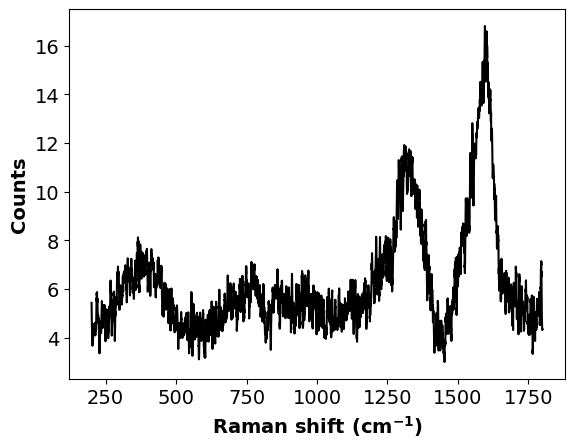

In [7]:

wave_number , counts = import_raman(folder + 'CorkC_glass_633 nm_1800 gr_mm_x50 LWD_100_50%_10_5 s_1800 gr_mm_01_0.txt')

# plot_raman(wave_number, counts)
baseline_fit  = asymmetric_least_squares_smoothing( counts)
corrected_signal = counts - baseline_fit
base_corr_smothed = apply_Savitzky_Golay(corrected_signal)
plot_raman(wave_number, base_corr_smothed)
plt.savefig('/Users/tiagopaiva/' + 'test' + '.svg')